# Практическое задание

## Урок 4. Сверточные нейронные сети

1. Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает

2. Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

---

## 1. Импорт библиотек и модулей 

In [1]:
# датасет cifar10
from tensorflow.keras.datasets import cifar10

# пакеты данных тензорного изображения 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# для нормализации входных данных 
from keras.layers import BatchNormalization

# для формирования бинарной матрицы класса 
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# свертка, пулинг 
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# визуализация
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

In [2]:
# список классов изображений 
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## 2. Установка параметров нейросети

In [3]:
# норамализация входных данных 
Sequential([
    BatchNormalization(input_shape=(8, 8, 2))
]).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 8, 8, 2)           8         
 Normalization)                                                  
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [4]:
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

## 3. Формирование тренировочной и тестовой подвыборки

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


## 4. Преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1

In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train / 255.0
X_test = X_test / 255.0

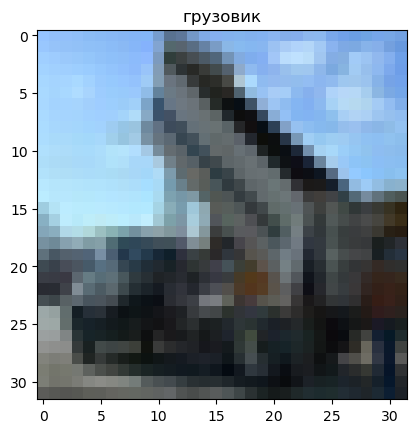

In [7]:
N = 50

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

## 5. Создание модели нейронной сети

In [8]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

##  6. Аугментация 

In [9]:
data_augmentation = False

In [10]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=128,
              epochs=5,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.2, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train, 
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))

Не используется data augmentation
Epoch 1/5
391/391 [==============================] - 88s 224ms/step - loss: 2.2896 - accuracy: 0.1230 - val_loss: 2.2353 - val_accuracy: 0.1647
Epoch 2/5
391/391 [==============================] - 85s 218ms/step - loss: 2.1154 - accuracy: 0.2097 - val_loss: 1.9987 - val_accuracy: 0.2783
Epoch 3/5
391/391 [==============================] - 85s 218ms/step - loss: 2.0103 - accuracy: 0.2589 - val_loss: 1.9378 - val_accuracy: 0.3120
Epoch 4/5
391/391 [==============================] - 88s 225ms/step - loss: 1.9471 - accuracy: 0.2898 - val_loss: 1.8845 - val_accuracy: 0.3322
Epoch 5/5
391/391 [==============================] - 95s 244ms/step - loss: 1.8673 - accuracy: 0.3275 - val_loss: 1.7843 - val_accuracy: 0.3705


## 7. Проверка работы обученной модели 

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.7843 - accuracy: 0.3705
Test loss: 1.7843118906021118
Test accuracy: 0.37049999833106995


In [12]:
# N = 3
# y_p = model.predict(X_test[N:N+1])
# y_t = np.argmax(y_test[N:N+1], axis = 1 )
# y_i = np.argmax(y_p, axis = 1 )
# plt.imshow(X_test[N])
# plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
# plt.show()

## 8. Подбор гиперпараметров и анализ их влияния на качество нейройнной сети 

In [8]:
# создадим словарь с параметрами 
diсt_params = {
    'set_1': (2, 32), # первое значение - количество слоев, второй - количество фильтров 
    'set_2': (2, 64),
    'set_3': (3, 32),
    'set_4': (3, 64)  
}

# список для сохранения результатов
list_metris_total_cnn_cifar10 = []

# список наименований столбцов
list_cols_cnn_cifar10 = ['кол_во_слоев', 'кол_во_фильтров', 'accuracy']

In [9]:
# функция для подбора гиперпараметров 

def model_cnn_cifar10(X_train, y_test, **kwargs):
    l_nn = kwargs.get(k) # количество слоев и количество фильтров - значение словаря 
    
    layes_num = l_nn[0] # количество слоев 
    filters_num = l_nn[1] # количество фильтров
    
    # конфигурирование слоев нейросети
    model = Sequential()
    for i in range(layes_num):
        # слои нейросети отвественные за свертку и max-pooling
        model.add(Conv2D(filters_num, (3, 3), padding='same', input_shape=X_train.shape[1:]))
        model.add(Activation('relu'))
        model.add(Conv2D(filters_num, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
  # полносвязные слои нейронной сети
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))  

    
    # компиляция модели 
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=512,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
#     print(f"слоев - {layes_num}, фильтров - {filters_num}, accuracy - {round(float(history.history['accuracy'][0])*100, 2)}")
    
    
    best_metrics_model_two_layers = round(float(history.history['accuracy'][0])*100, 2) 
    list_total = []
    list_total.append(layes_num) # количество слоев
    list_total.append(filters_num) # количество фильтром
    list_total.append(best_metrics_model_two_layers) # значение accuracy
    
    list_metris_total_cnn_cifar10.append(list_total)    

In [10]:
%%time

for k in diсt_params:
    model_cnn_cifar10(X_train=X_train, y_test=y_test, **diсt_params)
    
# CPU times: total: 54min 8s
# Wall time: 8min 12s

CPU times: total: 54min 8s
Wall time: 8min 12s


In [11]:
# сформируем датасет из списков 
metris_total_cnn_cifar10 = pd.DataFrame(list_metris_total_cnn_cifar10, columns=list_cols_cnn_cifar10)
# отсортируем полученные данные по столбцу точность нейронной сети(accuracy)
metris_total_cnn_cifar10.sort_values(by=list_cols_cnn_cifar10[2], ascending=False)

,кол_во_слоев,кол_во_фильтров,accuracy
1,2,64,22.06
0,2,32,19.11
3,3,64,15.78
2,3,32,13.50


Вывод: Улучшение работы нейронной сети в большей степени связано с увеличением количества фильтров, то есть увеличением ширины сети, чем с увеличением глубины.
Для работы с CIFAR100 и IMAGENET необходимо было бы провести агументацию, увеличить количество фильтров
для MNIST - увеличить количество слоев